In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
#storing the file path/ url path in a variable
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv"

#make dataframe of the data
df0 = pd.read_csv(url)
print('Dataset imported')

Dataset imported


In [3]:
df0.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df0.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


### checking shape & datatypes of the columns in data...

In [5]:
print(df0.shape)
print(' ')
print(df0.dtypes)

(1000, 40)
 
months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hou

## dataset contains both numerical and categorical datatype.

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df0.drop('_c39', axis = 1, inplace = True)

## dataset contains zero null values except "_c39", which is empty column, and we have deleted it from our dataset.

In [8]:
df0.shape

(1000, 39)

## dataset have 39 columns and 1000 rows

In [9]:
df0.duplicated().sum()

0

## dataset have zero duplicate value

In [10]:
df0.select_dtypes(np.number).columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [11]:
df0.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [12]:
df0.select_dtypes('object').columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [13]:
print(len(df0.select_dtypes('object').columns))
print(len(df0.select_dtypes(np.number).columns))

21
18


In [14]:
df0[df0 =='?'].count()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [15]:
df0.replace('?',np.nan,inplace=True)

In [16]:
df0.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [17]:
df0['collision_type'] =df0['collision_type'].fillna(df0['collision_type'].mode()[0])
df0['property_damage'] =df0['property_damage'].fillna(df0['property_damage'].mode()[0])
df0['police_report_available'] =df0['police_report_available'].fillna(df0['police_report_available'].mode()[0])

In [18]:
df0.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
df0[df0 ==0].count()

months_as_customer               1
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                 798
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                  508
capital-loss                   475
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day        52
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

In [20]:
df1=df0.copy()

In [21]:
df1.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [22]:
df1.describe(include=[object]).T

,count,unique,top,freq
policy_bind_date,1000,951,01-01-2006,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


In [23]:
df1['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

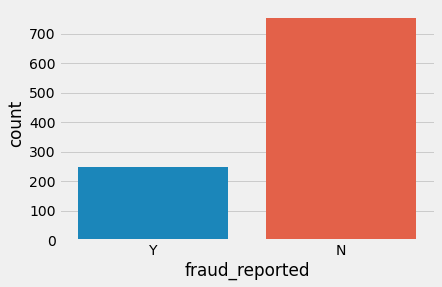

In [24]:
plt.style.use('fivethirtyeight')
sns.countplot(x='fraud_reported', data=df1)

In [25]:
df1['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

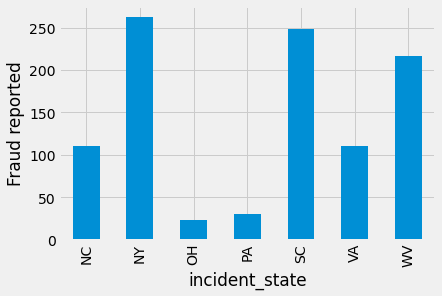

In [27]:
df1.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
plt.ylabel('Fraud reported')
plt.show()

NY    26.2 %
SC    24.8 %
WV    21.7 %
VA    11.0 %
NC    11.0 %
PA     3.0 %
OH     2.3 %
Name: incident_state, dtype: object

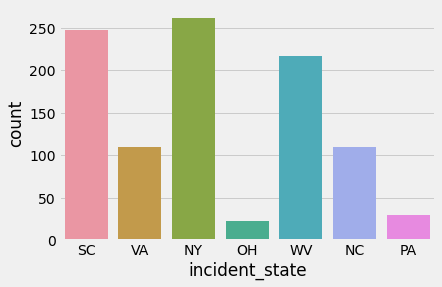

In [28]:
plt.style.use('fivethirtyeight')
sns.countplot(x='incident_state', data=df1)

incident_state = df1['incident_state'].value_counts(normalize=True)
round(incident_state * 100, 2).astype('str') + ' %'

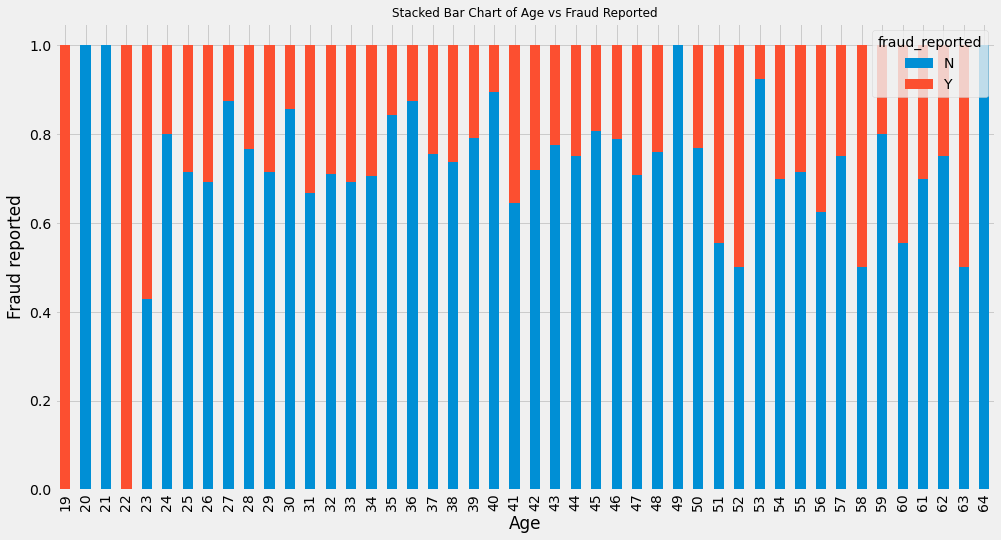

In [29]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.age, df1.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

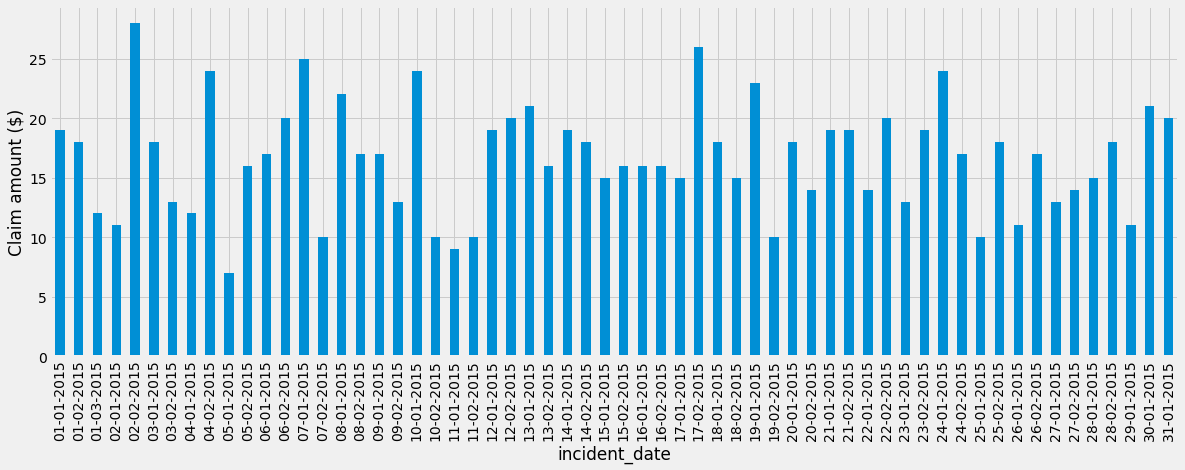

In [30]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df1.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

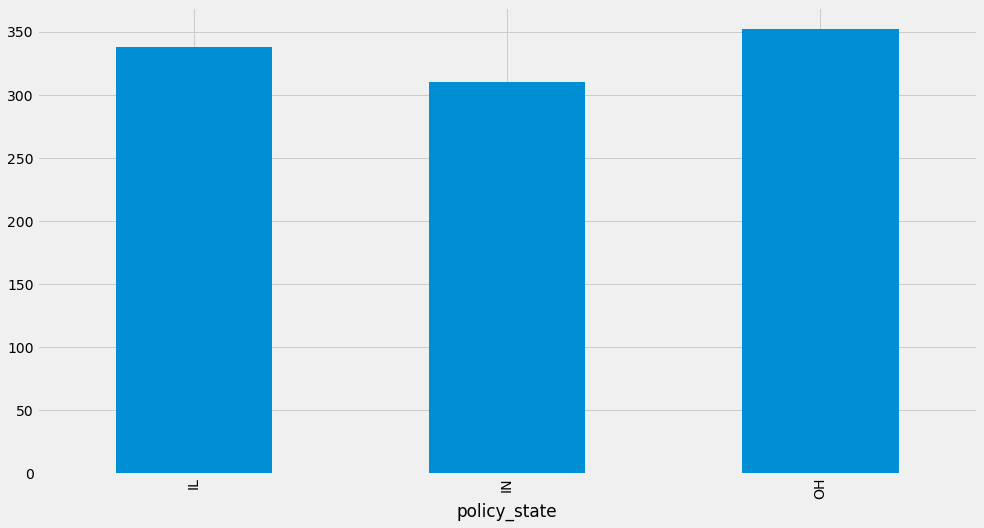

In [31]:
df1.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

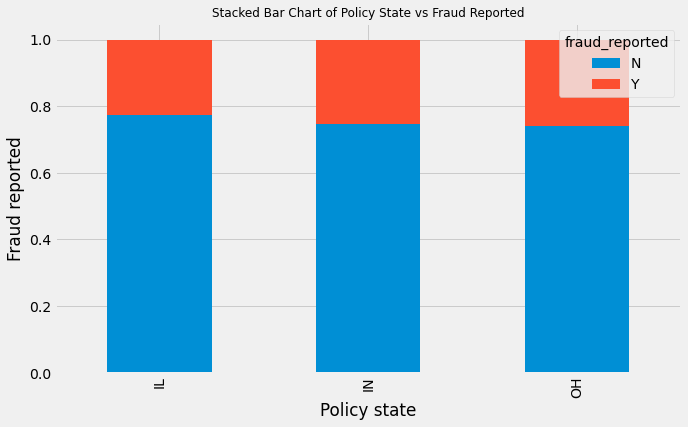

In [32]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df1.policy_state, df1.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()

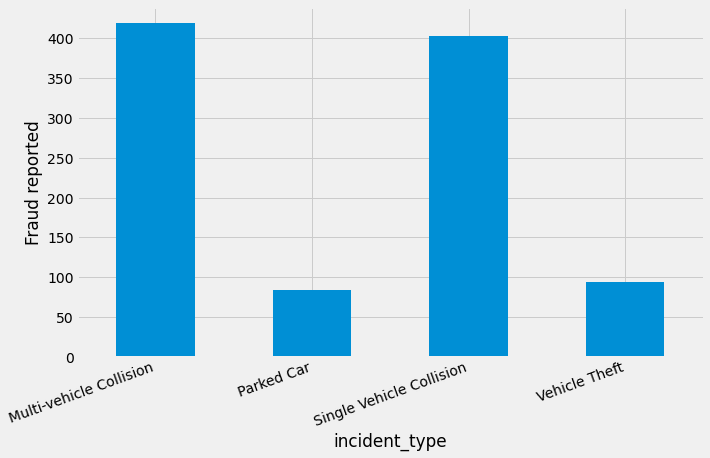

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df1.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

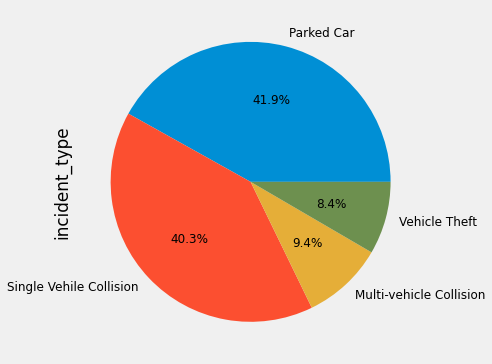

In [34]:
fig = plt.figure(figsize=(10,6))
ax = (df1['incident_type'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

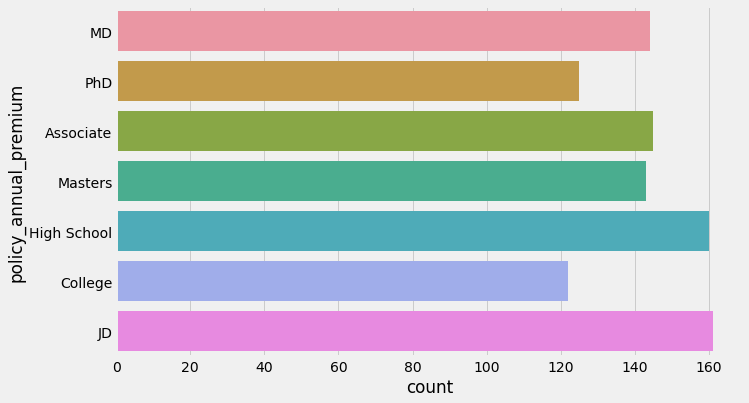

In [35]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df1) 
ax.set_ylabel('policy_annual_premium')
plt.show()

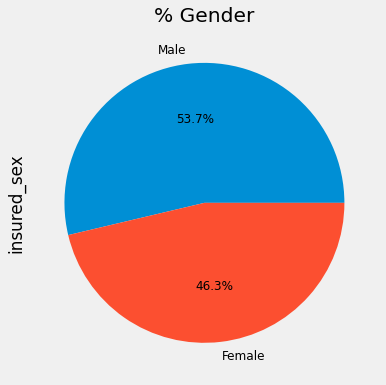

In [36]:
ax = (df1['insured_sex'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

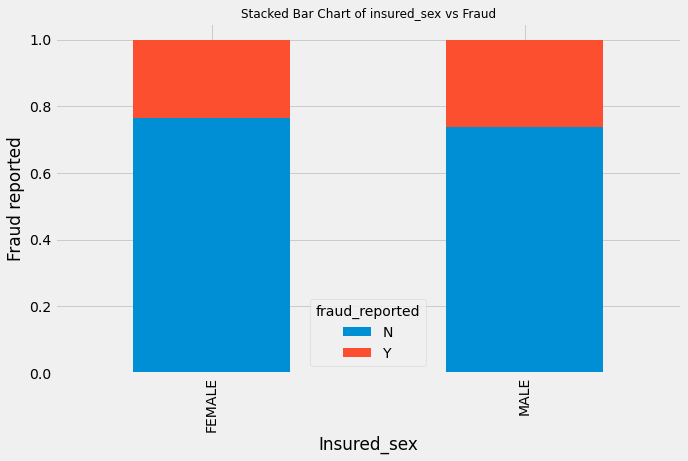

In [37]:
table=pd.crosstab(df1.insured_sex, df1.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

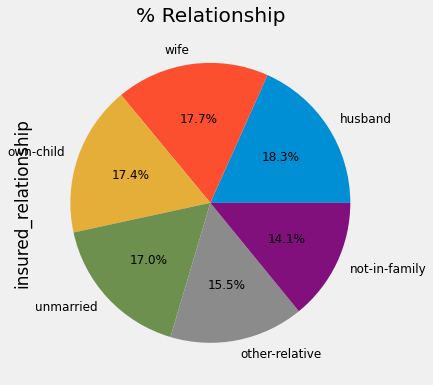

In [38]:
ax = (df1['insured_relationship'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

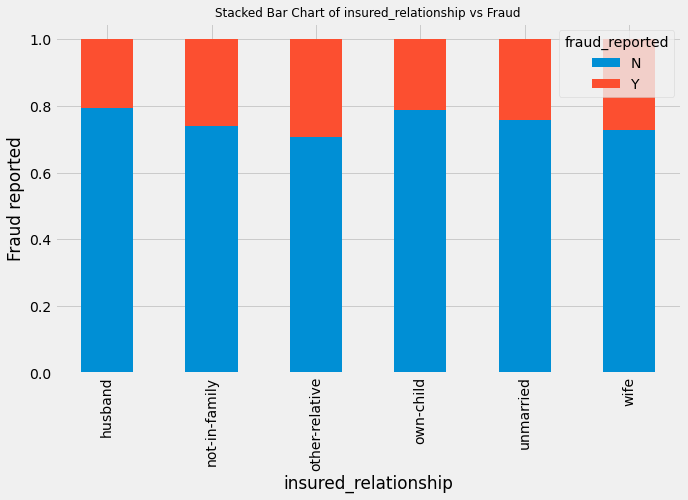

In [39]:
table=pd.crosstab(df1.insured_relationship, df1.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('insured_relationship')
plt.ylabel('Fraud reported')
plt.show()

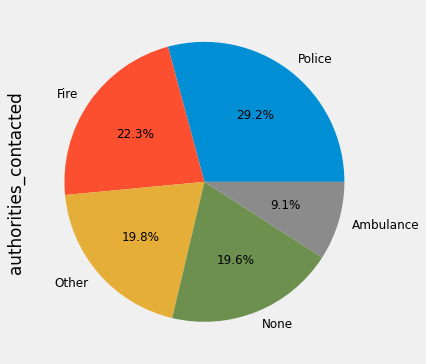

In [40]:
fig = plt.figure(figsize=(10,6))
ax = (df1['authorities_contacted'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

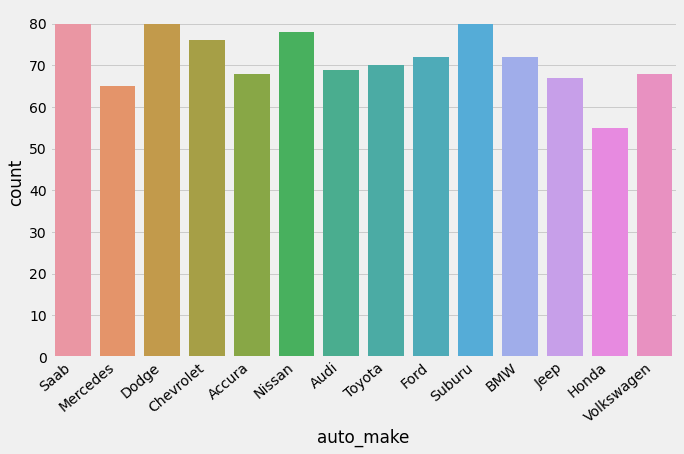

In [41]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


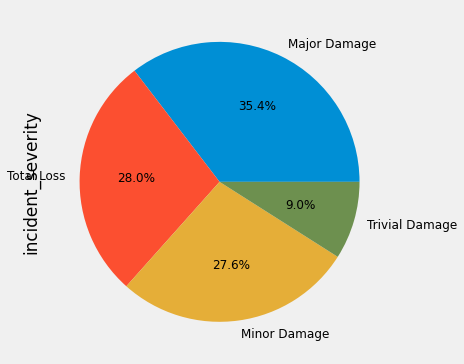

In [42]:
fig = plt.figure(figsize=(10,6))
ax = (df1['incident_severity'].value_counts()*100.0 /len(df1))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  


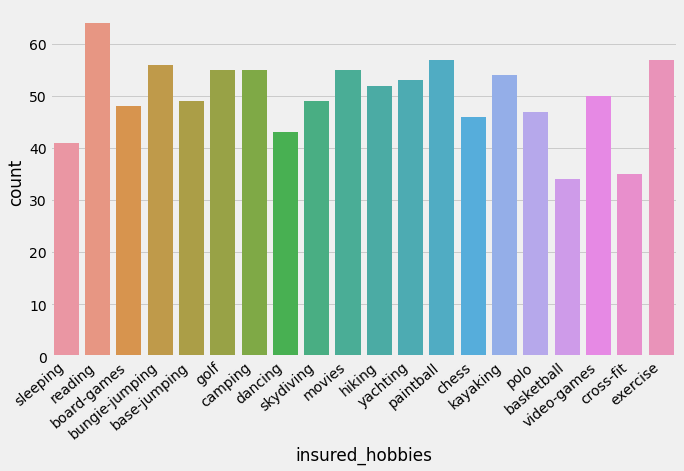

In [43]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [44]:
df2=df1.copy()

#  checking skewness

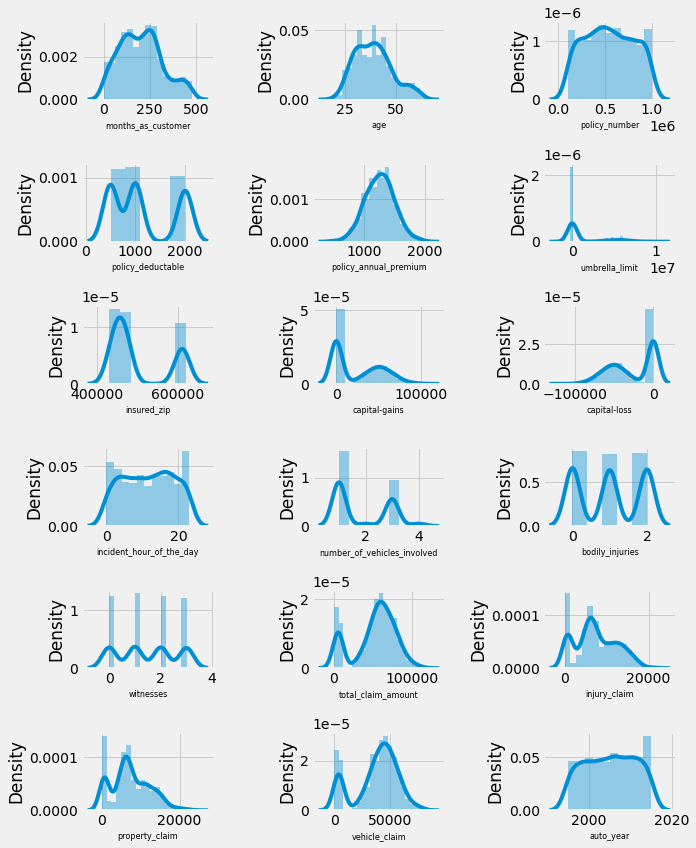

In [45]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(10,12))
for column in df2[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']].columns:
    plt.subplot(6,3,i+1)
    sns.distplot(df2[column],kde=True)
    plt.xlabel(column,fontsize=8)
    i+=1
    
plt.tight_layout()
plt.show()

In [46]:
import scipy.stats
from scipy.stats import skew
from scipy.stats import boxcox

In [47]:
df2[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [48]:
df2[['umbrella_limit']]=np.log1p(df2[['umbrella_limit']])

In [49]:
df3=df2.copy()

In [50]:
df3[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

## skewness have been reduced 

## Outlier detection

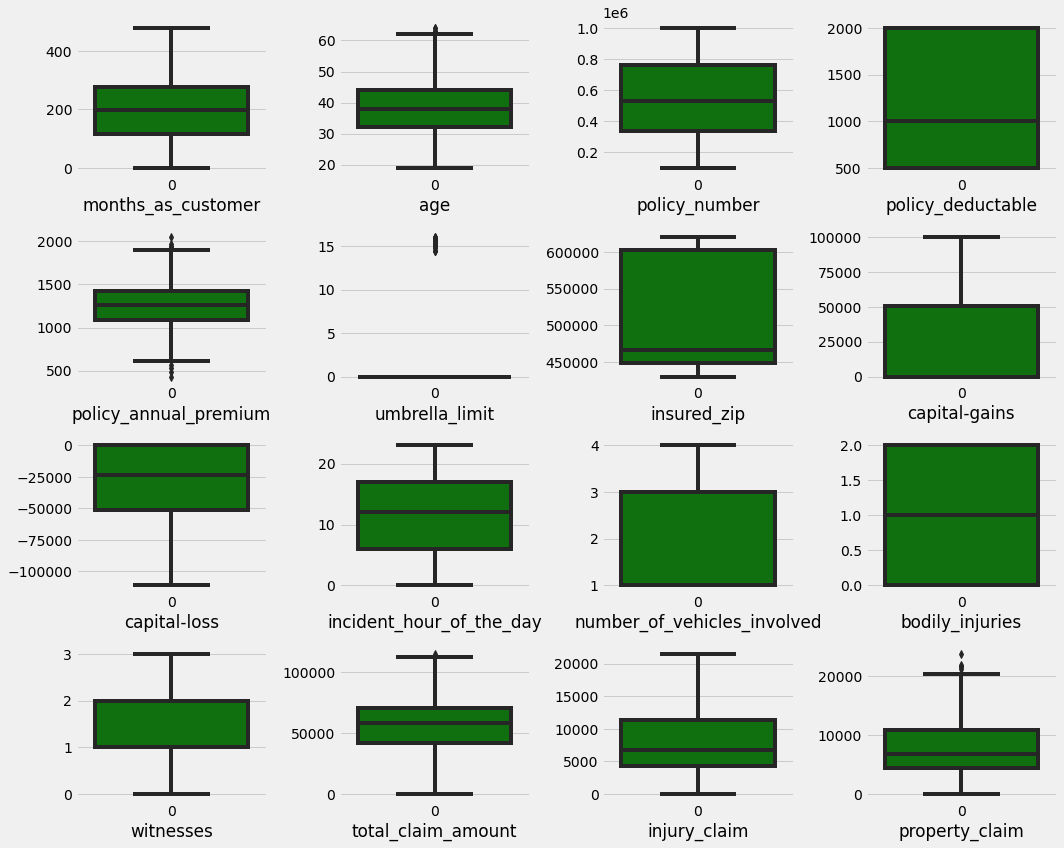

In [51]:
collist=df3[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']].columns.values

plt.figure(figsize=(15,12))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df3[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## there is no such outlier present in the dataset.

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               999 non-null    float64
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [78]:
df3.dropna(inplace=True)

In [79]:
df4=df3.copy()

## heatmap

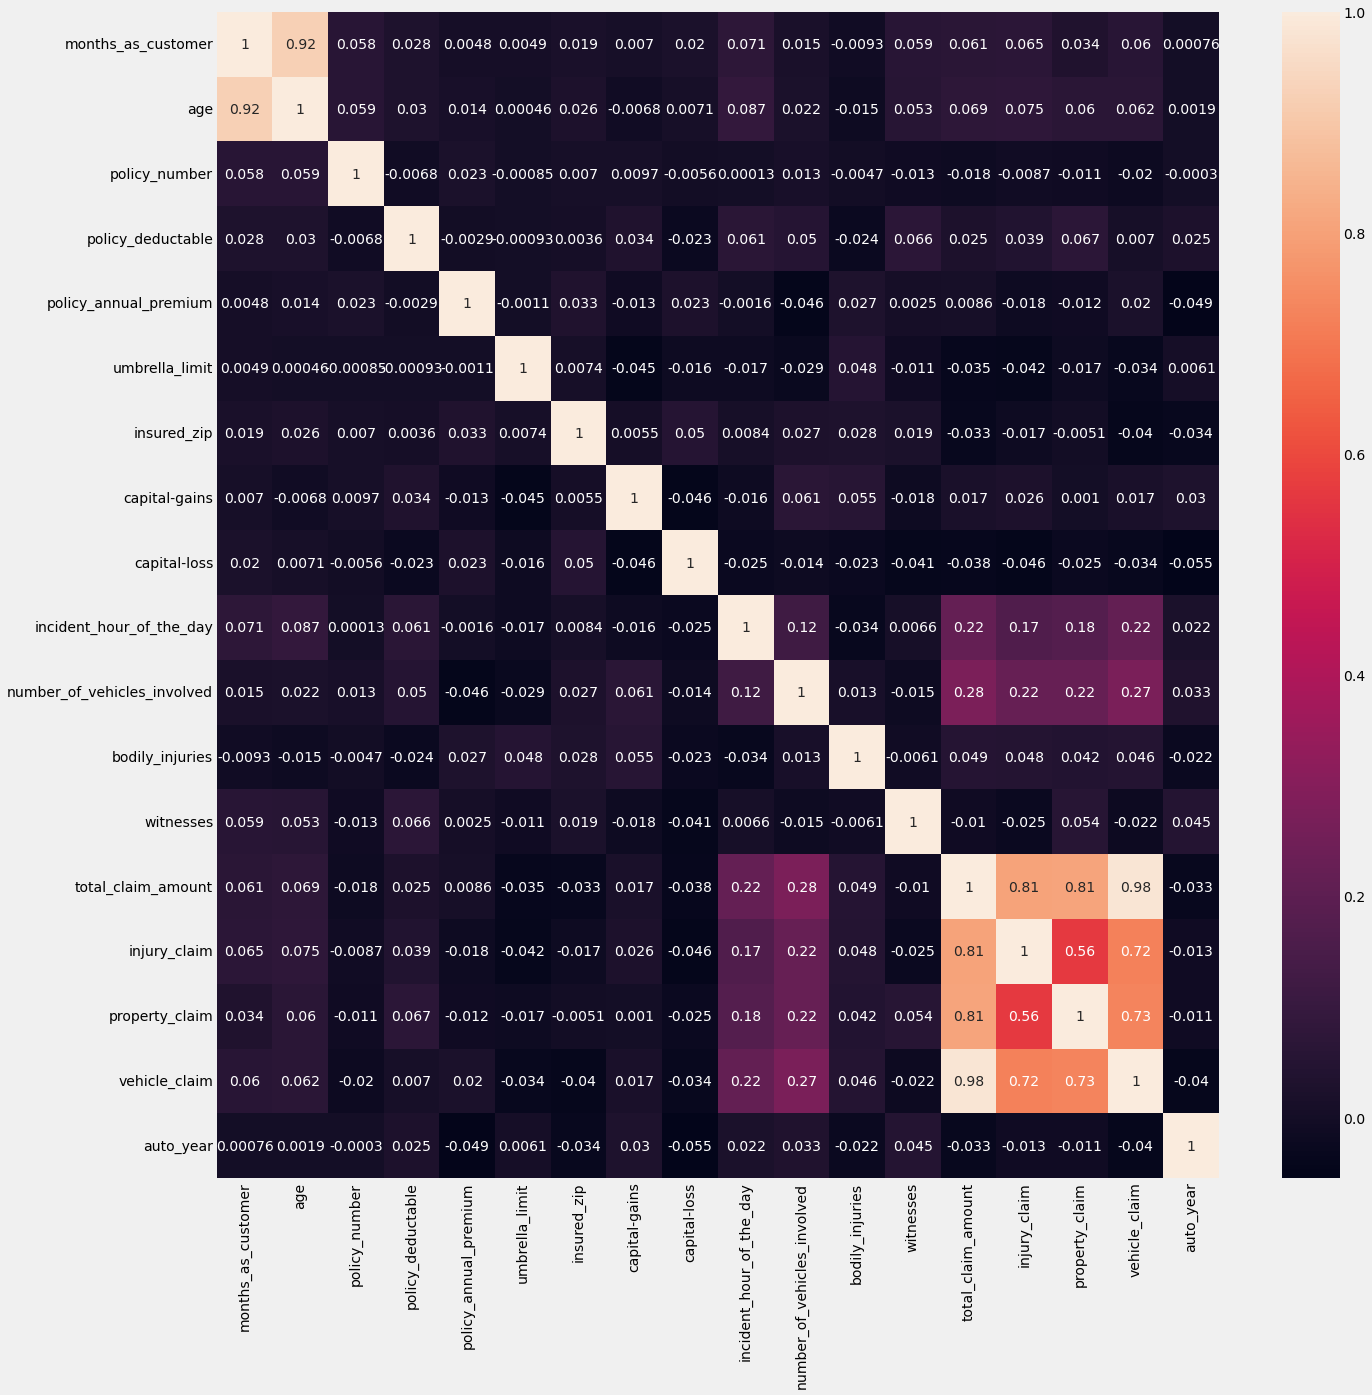

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(), annot=True)
plt.show()

## We will be dropping insignificant features like:

In [81]:
df4.drop(columns=['age','total_claim_amount',"policy_number", 
                  "policy_bind_date", "insured_zip", "incident_location", "incident_date"],axis=1, inplace=True)

In [82]:
df5=df4.copy()

In [83]:
df5

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,OH,250/500,1000,1406.91,0.000000,MALE,MD,craft-repair,sleeping,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,IN,250/500,2000,1197.22,15.424949,MALE,MD,machine-op-inspct,reading,...,0,0,NO,780,780,3510,Mercedes,E400,2007,Y
2,134,OH,100/300,2000,1413.14,15.424949,FEMALE,PhD,sales,board-games,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,IL,250/500,2000,1415.74,15.607270,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,IL,500/1000,1000,1583.91,15.607270,MALE,Associate,sales,board-games,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,OH,500/1000,1000,1310.80,0.000000,FEMALE,Masters,craft-repair,paintball,...,0,1,NO,17440,8720,61040,Honda,Accord,2006,N
996,285,IL,100/300,1000,1436.79,0.000000,FEMALE,PhD,prof-specialty,sleeping,...,2,3,NO,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,OH,250/500,500,1383.49,14.914123,FEMALE,Masters,armed-forces,bungie-jumping,...,2,3,YES,7500,7500,52500,Suburu,Impreza,1996,N
998,458,IL,500/1000,2000,1356.92,15.424949,MALE,Associate,handlers-cleaners,base-jumping,...,0,1,YES,5220,5220,36540,Audi,A5,1998,N


In [84]:
df5.select_dtypes('object').columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

## encoding

In [85]:
#One-hot encoding all categorical columns except output column(i.e. fraud_reported)
list_hot_encoded = []
for column in df5.columns:
    if(df5[column].dtypes==object and column != 'fraud_reported'):
        df5= pd.concat([df5, pd.get_dummies(df5[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
df5 = df5.drop(list_hot_encoded, axis=1)

#Binary encoder for output column
df5['fraud_reported'] = df5['fraud_reported'].map( {'Y':1, 'N':0})

df5

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,1000,1406.91,0.000000,53300,0,5,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,228,2000,1197.22,15.424949,0,0,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134,2000,1413.14,15.424949,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,0,0,0
3,256,2000,1415.74,15.607270,48900,-62400,5,1,1,2,...,0,0,0,0,0,1,0,0,0,0
4,228,1000,1583.91,15.607270,66000,-46000,20,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0.000000,0,0,20,1,0,1,...,0,0,0,0,0,0,0,0,0,0
996,285,1000,1436.79,0.000000,70900,0,23,1,2,3,...,0,0,0,0,0,0,0,0,0,0
997,130,500,1383.49,14.914123,35100,0,4,3,2,3,...,0,0,0,0,0,0,0,0,0,0
998,458,2000,1356.92,15.424949,0,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df6=df5.copy()

In [87]:
df6.select_dtypes('object').columns

Index([], dtype='object')

## differentiating the features and label

In [88]:
X = df6.drop(['fraud_reported'],axis=1)
X
y = df6['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 999, dtype: int64

## scaling the data using StandardScaler

In [89]:
from sklearn.preprocessing import StandardScaler

## data scaling

In [90]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

## spliting the train and test data

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [92]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((749, 156), (749,), (250, 156), (250,))

## machine learning model

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [94]:
def model(classifier,X_train,y_train,X_test,y_test):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,X_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

# 1.LogisticRegression

Cross Validation Score :  84.23%
ROC_AUC Score :  73.37%


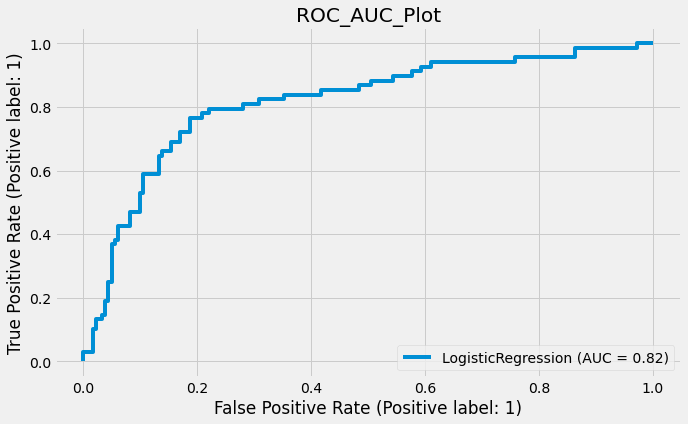

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       182
           1       0.65      0.59      0.62        68

    accuracy                           0.80       250
   macro avg       0.75      0.73      0.74       250
weighted avg       0.80      0.80      0.80       250



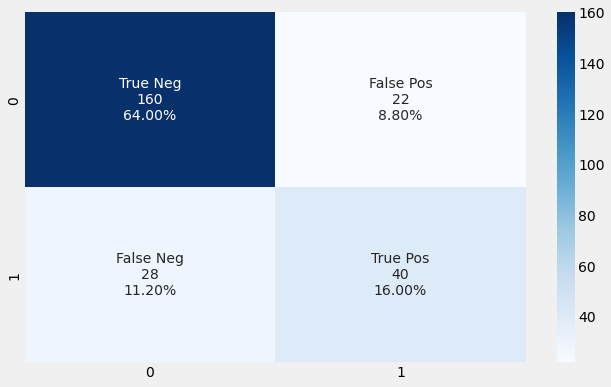

In [95]:
model_lr= LogisticRegression()
model(model_lr,X_train,y_train,X_test,y_test)
model_evaluation(model_lr,X_test,y_test)

# 2.DecisionTreeClassifier

Cross Validation Score :  72.00%
ROC_AUC Score :  70.61%


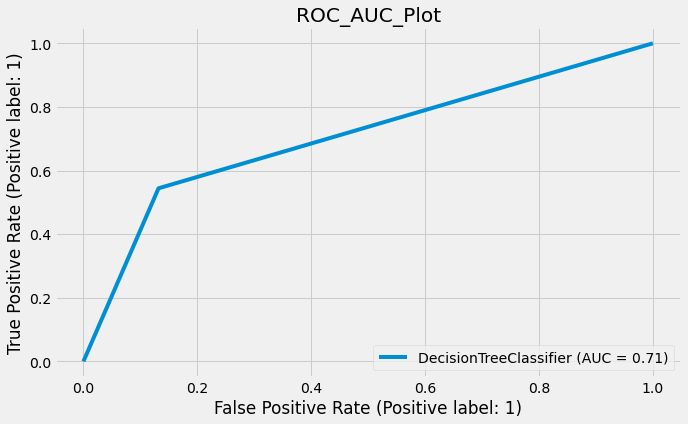

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       182
           1       0.61      0.54      0.57        68

    accuracy                           0.78       250
   macro avg       0.72      0.71      0.71       250
weighted avg       0.77      0.78      0.78       250



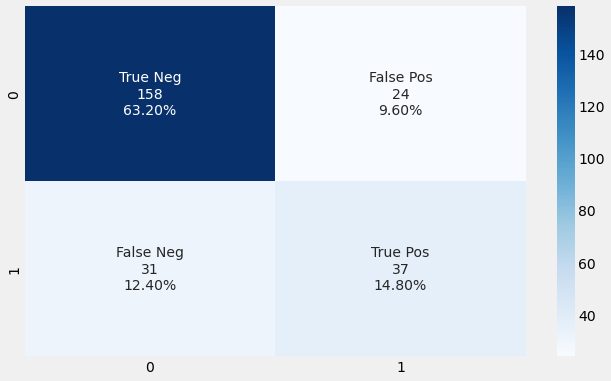

In [96]:
model_dtc = DecisionTreeClassifier()
model(model_dtc,X_train,y_train,X_test,y_test)
model_evaluation(model_dtc,X_test,y_test)

# 3.RandomForestClassifier

Cross Validation Score :  85.31%
ROC_AUC Score :  57.18%


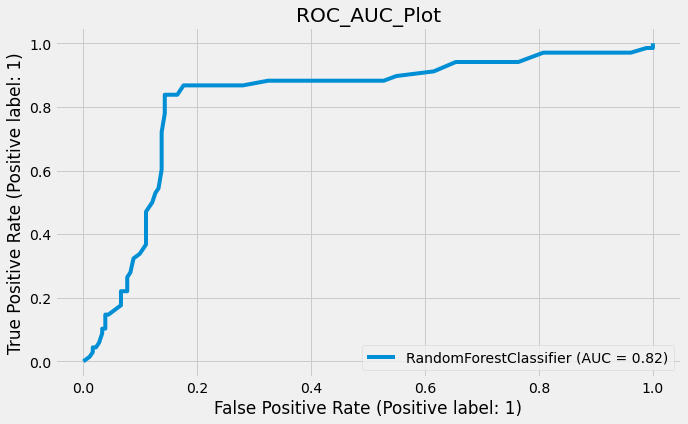

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       182
           1       0.52      0.22      0.31        68

    accuracy                           0.73       250
   macro avg       0.64      0.57      0.57       250
weighted avg       0.69      0.73      0.69       250



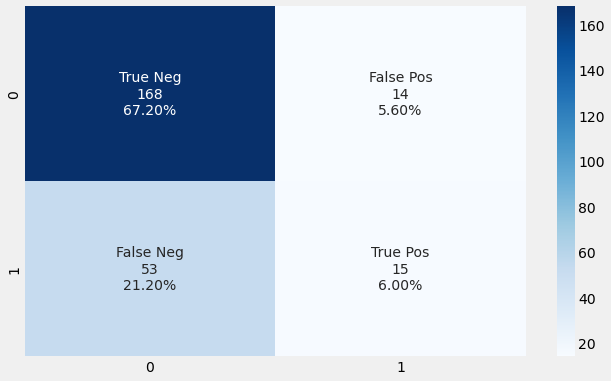

In [97]:
model_rfc=RandomForestClassifier()
model(model_rfc,X_train,y_train,X_test,y_test)
model_evaluation(model_rfc,X_test,y_test)

# 4.ExtraTreesClassifier

Cross Validation Score :  85.56%
ROC_AUC Score :  62.24%


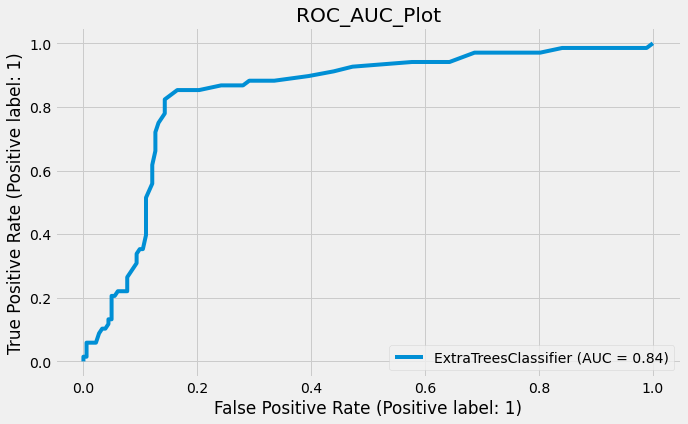

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       182
           1       0.57      0.34      0.43        68

    accuracy                           0.75       250
   macro avg       0.68      0.62      0.63       250
weighted avg       0.73      0.75      0.73       250



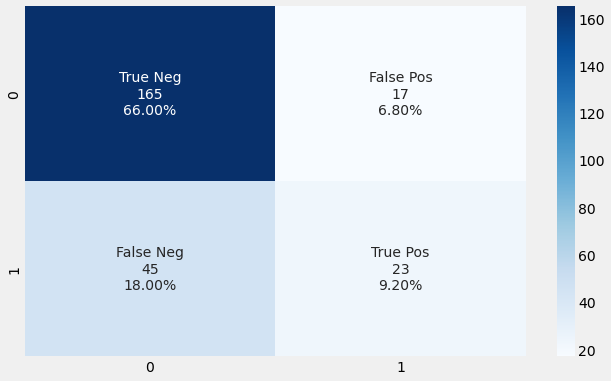

In [98]:
model_etc=ExtraTreesClassifier()
model(model_etc,X_train,y_train,X_test,y_test)
model_evaluation(model_etc,X_test,y_test)

# 5.KNeighborsClassifier

Cross Validation Score :  59.58%
ROC_AUC Score :  49.83%


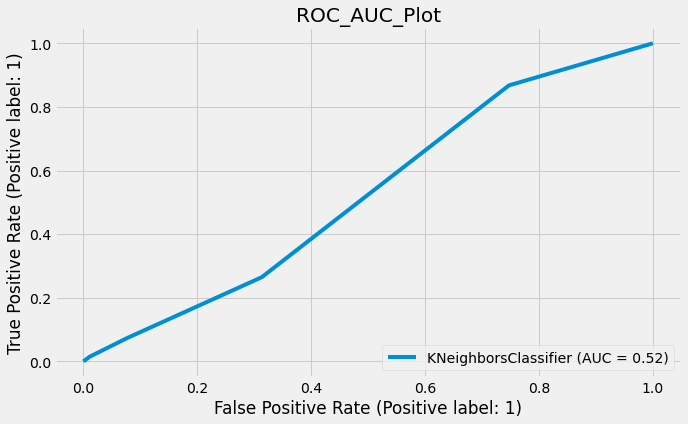

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       182
           1       0.26      0.07      0.11        68

    accuracy                           0.69       250
   macro avg       0.50      0.50      0.46       250
weighted avg       0.60      0.69      0.62       250



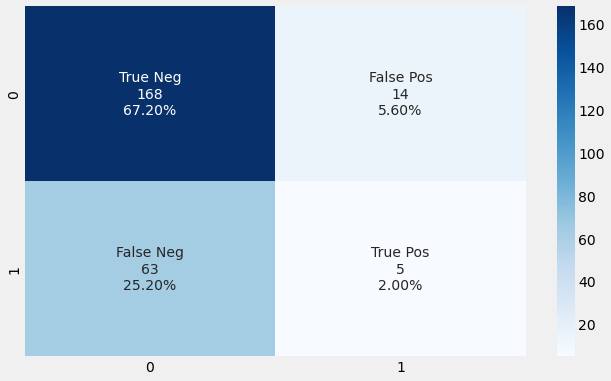

In [99]:
model_knc=KNeighborsClassifier()
model(model_knc,X_train,y_train,X_test,y_test)
model_evaluation(model_knc,X_test,y_test)

# 6.SVC

Cross Validation Score :  86.53%
ROC_AUC Score :  56.81%


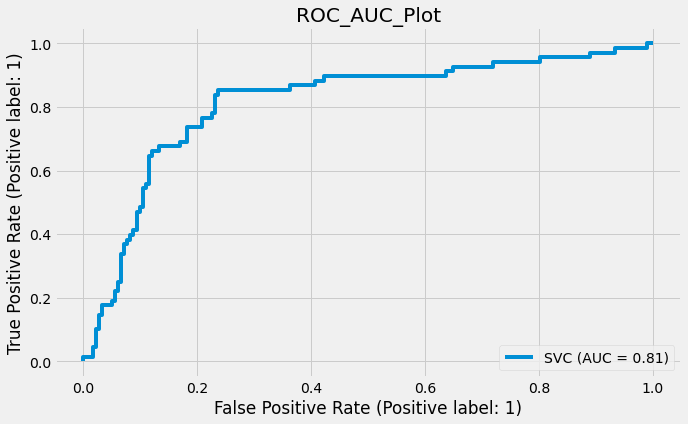

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       182
           1       0.57      0.19      0.29        68

    accuracy                           0.74       250
   macro avg       0.66      0.57      0.56       250
weighted avg       0.71      0.74      0.69       250



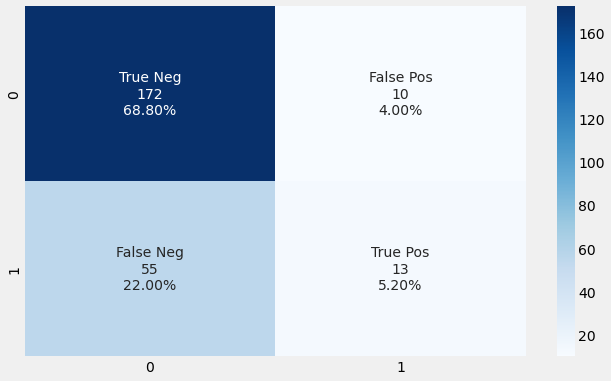

In [100]:
model_svc=SVC()
model(model_svc,X_train,y_train,X_test,y_test)
model_evaluation(model_svc,X_test,y_test)

# 7.GaussianNB


Cross Validation Score :  68.90%
ROC_AUC Score :  63.69%


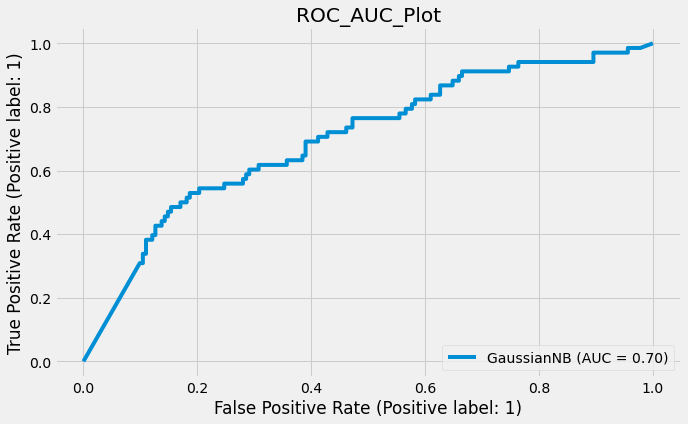

              precision    recall  f1-score   support

           0       0.84      0.54      0.66       182
           1       0.37      0.74      0.50        68

    accuracy                           0.59       250
   macro avg       0.61      0.64      0.58       250
weighted avg       0.72      0.59      0.61       250



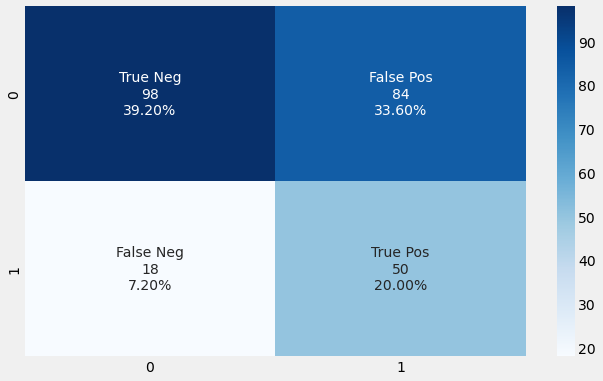

In [101]:
model_gnb=GaussianNB()
model(model_gnb,X_train,y_train,X_test,y_test)
model_evaluation(model_gnb,X_test,y_test)

# 8.AdaBoostClassifier


Cross Validation Score :  83.71%
ROC_AUC Score :  67.11%


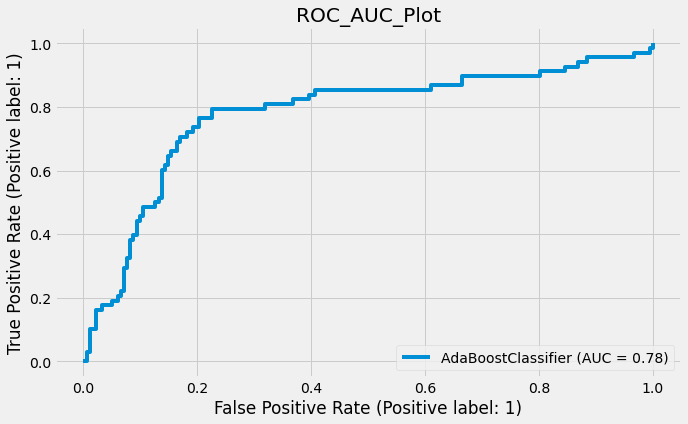

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       182
           1       0.62      0.44      0.52        68

    accuracy                           0.78       250
   macro avg       0.72      0.67      0.69       250
weighted avg       0.76      0.78      0.76       250



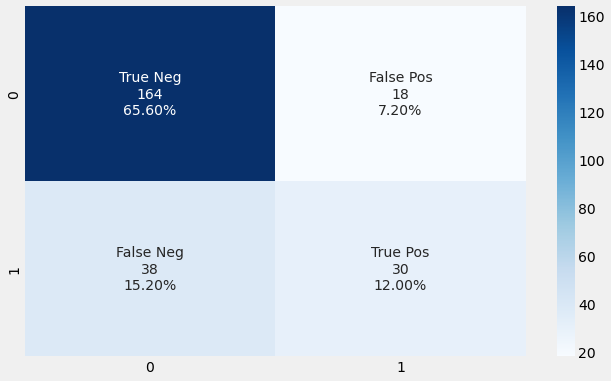

In [102]:
model_abc=AdaBoostClassifier()
model(model_abc,X_train,y_train,X_test,y_test)
model_evaluation(model_abc,X_test,y_test)

# 9.GradientBoostingClassifier

Cross Validation Score :  87.32%
ROC_AUC Score :  71.80%


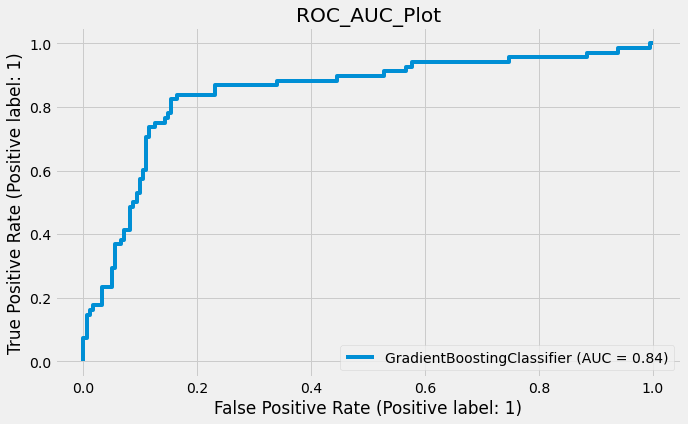

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       182
           1       0.68      0.53      0.60        68

    accuracy                           0.80       250
   macro avg       0.76      0.72      0.73       250
weighted avg       0.79      0.80      0.80       250



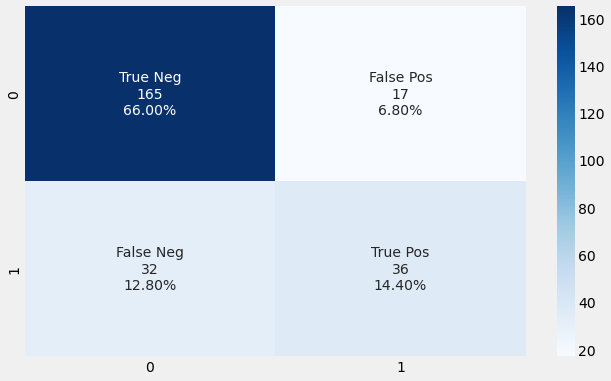

In [103]:
model_gbc=GradientBoostingClassifier()
model(model_gbc,X_train,y_train,X_test,y_test)
model_evaluation(model_gbc,X_test,y_test)

# 10.DummyClassifier


Cross Validation Score :  50.00%
ROC_AUC Score :  50.00%


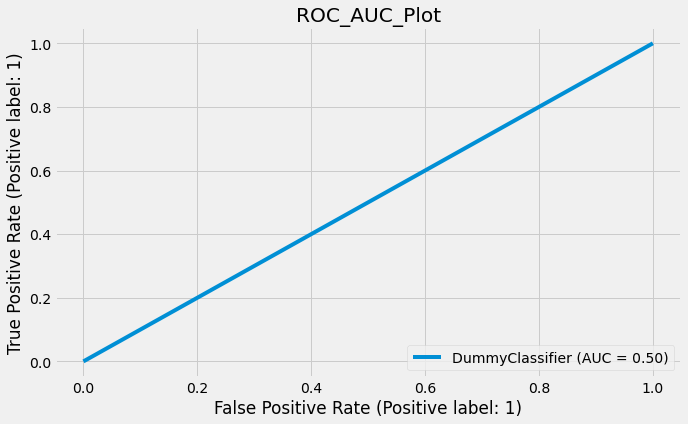

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       182
           1       0.00      0.00      0.00        68

    accuracy                           0.73       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.53      0.73      0.61       250



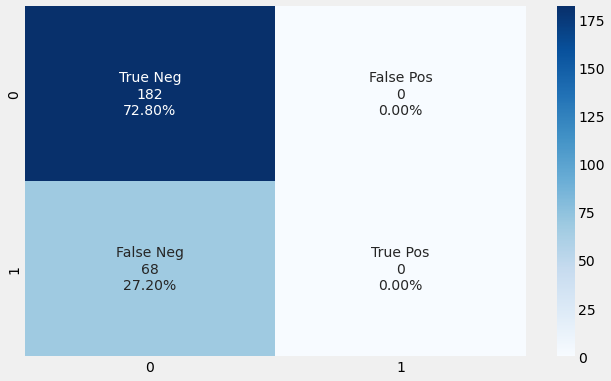

In [104]:
model_dc=DummyClassifier()
model(model_dc,X_train,y_train,X_test,y_test)
model_evaluation(model_dc,X_test,y_test)

# Hyperparameter tuning using gridsearchcv

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid={"n_estimators":[5,50,250],
            "max_depth":[1,3,5,7],
            "learning_rate":[0.01,0.1,1,10]
           }

In [107]:
grid_search=GridSearchCV(estimator=model_gbc, param_grid=param_grid,n_jobs=-1)

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [5, 50, 250]})

In [112]:
best_param =grid_search.best_params_
print(best_param)

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}


In [113]:
grid_search.best_score_

0.8318389261744965

Cross Validation Score :  87.91%
ROC_AUC Score :  86.24%


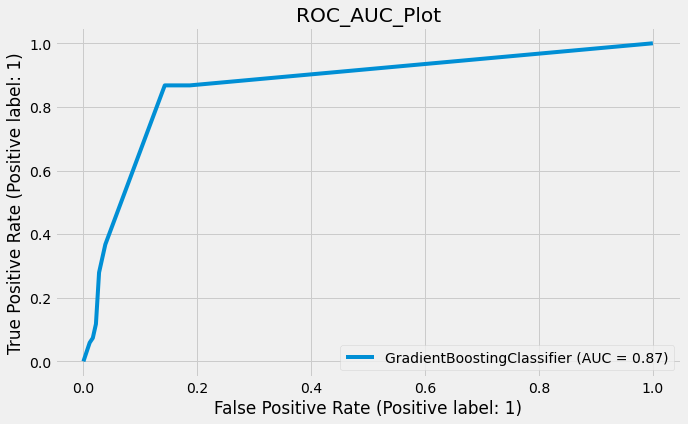

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       182
           1       0.69      0.87      0.77        68

    accuracy                           0.86       250
   macro avg       0.82      0.86      0.84       250
weighted avg       0.88      0.86      0.86       250



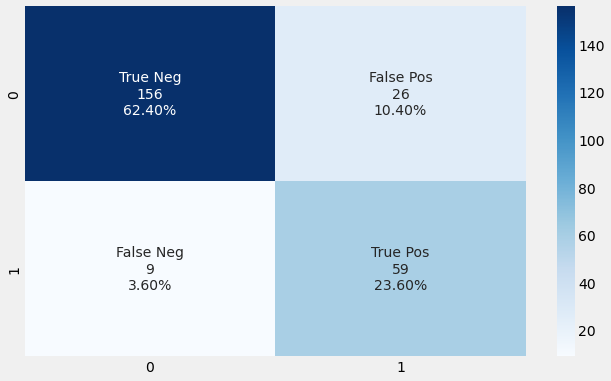

In [114]:
grid_search=GradientBoostingClassifier(learning_rate=1,max_depth=1,n_estimators=5)
grid_search.fit(X_train,y_train)
y_pred1=grid_search.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(grid_search,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred1)))
plot_roc_curve(grid_search, X_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

cm = confusion_matrix(y_test,grid_search.predict(X_test))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
# Classification Report
print(classification_report(y_test,grid_search.predict(X_test)))

## model's accuracy has increased after hyperparameter tuning .

In [115]:
import pickle

In [116]:
filename='insurance claims.pkl'
pickle.dump(model_gbc,open(filename,'wb'))